In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC

from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle


In [3]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [4]:
mrna_df =pd.read_csv('/Users/cp/Documents/dsi/capstone2/capstone2/data/capstone2.mrn_df2.csv')
df = pd.read_csv('/Users/cp/Documents/dsi/capstone2/capstone2/data/METABRIC_RNA_Mutation.csv')


/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
death_from_dict = {
    'Living':0
    ,'Died of Other Causes':0
    ,'Died of Disease':1
}
df.replace(death_from_dict, inplace =True)
mrna_df['death_from_cancer'] = df.death_from_cancer



In [6]:
mrna_df.death_from_cancer.fillna(0, inplace = True)

In [7]:
y = mrna_df.pop('death_from_cancer')
X = mrna_df

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify = y)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=1, stratify = y)
# X_train2, X_test, y_train2, y_test = train_test_split(X_train.copy(), y_train.copy(), test_size=0.10, random_state=1)

In [9]:
#     gradient_boosting_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
#                              ,'max_depth': [2, 4, 8]
#                              ,'subsample': [0.25, 0.5, 0.75, 1.0]
#                              ,'min_samples_leaf': [1, 2, 4]
#                              ,'max_features': ['sqrt', 'log2', None]
#                              ,'n_estimators': [5,10,25,50,100,200]}

#     random_forest_grid = {'max_depth': [2, 4, 8]
#                          ,'max_features': ['sqrt', 'log2', None]
#                          ,'min_samples_leaf': [1, 2, 4]
#                          ,'min_samples_split': [2, 4]
#                          ,'bootstrap': [True, False]
#                          ,'n_estimators': [5,10,25,50,100,200]}
    
logistic_regression_grid = {'Cs':[2, 5,10, 50,100]
                       ,'cv':[2,4,8]
                       ,'solver':['lbfgs', 'liblinear']
                       ,'max_iter' : [50]
                       ,'penalty':['l1']

                       }
#     svm_grid = {'C':[0.5, 1, 2]
                          
#                            ,'kernel':['rbf', 'liblinear']}

In [10]:


logistic_randomsearch = RandomizedSearchCV(LogisticRegressionCV()
                                              ,logistic_regression_grid
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

# svm_randomsearch = RandomizedSearchCV(SVC(gamma = 'auto')
#                                               ,svm_grid
#                                               ,n_jobs=-1
#                                               ,verbose=False
#                                               ,scoring='roc_auc')

# gradient_randomsearch = RandomizedSearchCV(GradientBoostingClassifier()
#                                           ,gradient_boosting_grid
#                                           ,n_jobs=-1
#                                           ,verbose=False
#                                           ,scoring='roc_auc')

# random_foreset_randomsearch = RandomizedSearchCV(RandomForestClassifier()
#                                                 ,random_forest_grid
#                                                 ,n_jobs=-1
#                                                 ,verbose=False
#                                                 ,scoring='roc_auc')




In [11]:
logistic_randomsearch.fit(X_train, y_train)
print(f"Best logistic Parameters: {logistic_randomsearch.best_params_}")
print(f"Best logistic Model: {logistic_randomsearch.best_estimator_}")
print(f"Best logistic Score: {logistic_randomsearch.best_score_:.4f}")

# svm_randomsearch.fit(X_train, y_train)
# print(f"Best svm Parameters: {svm_randomsearch.best_params_}")
# print(f"Best svm Model: {svm_randomsearch.best_estimator_}")
# print(f"Best svm Score: {svm_randomsearch.best_score_:.4f}")

# gradient_randomsearch.fit(X_train, y_train)
# print(f"Best Gradient Parameters: {gradient_randomsearch.best_params_}")
# print(f"Best Gradient Model: {gradient_randomsearch.best_estimator_}")
# print(f"Best Gradient Score: {gradient_randomsearch.best_score_:.4f}")

# random_foreset_randomsearch.fit(X_train, y_train)
# print(f"Best Random Forest Parameters: {random_foreset_randomsearch.best_params_}")
# print(f"Best Random Forest Model: {random_foreset_randomsearch.best_estimator_}")
# print(f"Best Random Forest Score: {random_foreset_randomsearch.best_score_:.4f}")

Best logistic Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 50, 'cv': 2, 'Cs': 100}
Best logistic Model: LogisticRegressionCV(Cs=100, cv=2, max_iter=50, penalty='l1',
                     solver='liblinear')
Best logistic Score: 0.6552


In [12]:
logistic_best_model = logistic_randomsearch.best_estimator_
logistic_y_hats = logistic_best_model.predict(X_test)
print(f"Gradient ROC Score = {roc_auc_score(y_test, logistic_y_hats):.4f}")

# svm_best_model = svm_randomsearch.best_estimator_
# svm_y_hats = logistic_best_model.predict(X_test)
# print(f"Gradient ROC Score = {roc_auc_score(y_test, svm_y_hats):.4f}")

# gradient_best_model = gradient_randomsearch.best_estimator_
# gy_hats = gradient_best_model.predict(X_test)
# print(f"Gradient ROC Score = {roc_auc_score(y_test, gy_hats):.4f}")

# random_forest_best_model = random_foreset_randomsearch.best_estimator_
# ry_hats = random_forest_best_model.predict(X_test)
# print(f"Random Forest ROC Score = {roc_auc_score(y_test, ry_hats):.4f}")


Gradient ROC Score = 0.5113


In [13]:
lst =X_train.shape,X_train2.shape, X_test.shape, X_val.shape
print(lst)

NameError: name 'X_train2' is not defined

In [14]:
print(classification_report(y_test, logistic_y_hats))
# print(classification_report(y_test, svm_y_hats))
# print(classification_report(y_test, gy_hats))
# print(classification_report(y_test, ry_hats))

              precision    recall  f1-score   support

         0.0       0.68      0.97      0.80       193
         1.0       0.45      0.05      0.10        93

    accuracy                           0.67       286
   macro avg       0.57      0.51      0.45       286
weighted avg       0.61      0.67      0.57       286



In [15]:
print(accuracy_score(y_test, logistic_y_hats))
# print(accuracy_score(y_test, svm_y_hats))
# print(accuracy_score(y_test, gy_hats))
# print(accuracy_score(y_test, ry_hats))

0.6713286713286714


# removed validation set

In [16]:
# validate_lg_y_hat = logistic_best_model.predict(X_val)


# validate_svm_y_hat = svm_best_model.predict(X_val)
# validate_gb_y_hat = gradient_best_model.predict(X_val)
# validate_rf_y_hat = random_forest_best_model.predict(X_val)



In [17]:
# print(accuracy_score(y_val, validate_lg_y_hat))


# print(accuracy_score(y_val, validate_svm_y_hat))
# print(accuracy_score(y_val, validate_gb_y_hat))
# print(accuracy_score(y_val, validate_rf_y_hat))

In [18]:


# print(classification_report(y_val, validate_lg_y_hat))


# print(classification_report(y_val, validate_svm_y_hat))
# print(classification_report(y_val, validate_gb_y_hat))
# print(classification_report(y_val, validate_rf_y_hat))

In [19]:
# filename = 'random_forrest_model1.sav'
# pickle.dump(random_forest_best_model, open(filename, 'wb'))

In [20]:
# filename = 'gradient_best_model1.sav'
# pickle.dump(gradient_best_model, open(filename, 'wb'))

In [21]:
# filename = 'svm_best_model1.sav'
# pickle.dump(svm_best_model, open(filename, 'wb'))

In [22]:
# filename = 'logistic_best_model1.sav'
# pickle.dump(logistic_best_model, open(filename, 'wb'))

In [23]:
pca = PCA(n_components = 0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)


(1618, 243)
(286, 243)


164 features explain around 75% of the variance. From 489 features to 164, not too bad.


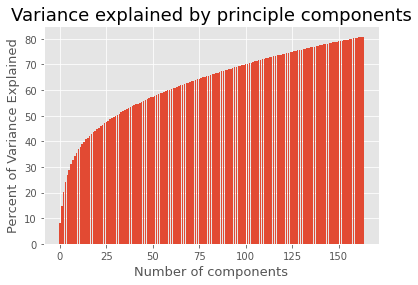

In [24]:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " features explain around 75% of the variance. From 489 features to ", k, ", not too bad.", sep='')

pca = PCA(n_components=k)
X_train.pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp)
plt.xlabel("Number of components", fontsize = 13)
plt.ylabel("Percent of Variance Explained", fontsize = 13)
# fig.suptitle('test title', fontsize=20)

plt.title("Variance explained by principle components", fontsize=18)
# plt.set_ylabel('Patient Count');
plt.savefig("PCA_component_variance.png", dpi=200)

In [25]:
X_test.shape

(286, 489)

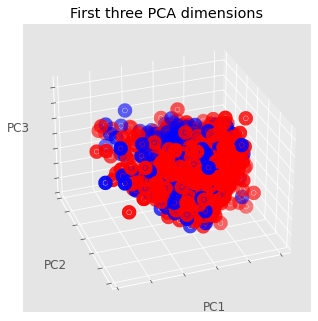

In [26]:
pca3 = PCA(n_components = 3).fit_transform(X_train)
colors = np.where(y_train==0, 'red', 'blue')
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(pca3[:, 0], pca3[:, 1], pca3[:, 2], c=colors, cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA dimensions")
ax.set_xlabel("PC1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC3")
ax.w_zaxis.set_ticklabels([])
plt.savefig("PCA_first_3_plt.png", dpi=200)
plt.show()


In [ ]:
test